# 4章　ニューラルネットワークの学習

ここでは学習とは訓練データから最適な重みパラメータの値を自動的に獲得することを指す。

## 4.1 データから学習する
ニューラルネットワークはデータから学習できる特徴がある。これは多数の重みパラメータを人力で設定する必要がなくなるため、有用である。

### 4.1.1 データ駆動
人にとって分かる規則性でもアルゴリズムで実現しようとすると難しい。アルゴリズムの考案ではなく、画像空特徴量を抽出したえパターンを学習させることで実現する。特徴量とはデータから重要なデータを的確に抽出できるように設計した変換器のことである。
画像の特徴量は通常、ベクトルとして記述される。(コンピュータビジョン分野ではSIFTやSURF、HOGなどが挙げられる)。それらの特徴量を使って画像データをベクトルに変換し、機械学習で用いる識別器で学習を行なう。

アルゴリズムを考える代わりに、問題に応じて適した特徴量を持ちいらなければ良い結果は得られない。(人の手によって特徴量を考える必要がある可能性)
人力においても、機械学習と特徴量によるアプローチも人の手が介在していたが、ディープラーニングでは特徴量の選択自体も機械が学習を行なう。(「5」の認識であっても、「犬」の認識であってもアプローチ方法は変わらない)

ニューラルネットワークは、対象とする問題に関係なくデータをそのまま生データとして「end-to-end」学習することができる。(生データの入力で目的の結果出力まで得られる)


### 4.1.2 訓練データとテストデータ
機械学習の問題では作成したモデルの汎化能力を正しく評価したい。そのため訓練データ(教師データ)とテストデータを分離する。一つのデータセットだけで学習、評価を行なうとそのデータセットにしか対応できていないものの良い結果が得られたと誤認してしまう。特定のデータセットのみにだけ過度に適合した状態を過学習(overfitting)と呼ぶ。必ず避けなければ行けない状態。


## 4.2 損失関数

ニューラルネットワークの学習ではある指標で現在の状態を表す。損失関数(loss function)と呼ばれ、この指標を基準として最適な重みの探索を行なう。関数は任意のものが用いられるが、一般的には二乗和誤差や交差エントロピー誤差が用いられる。
損失関数は教師データからどれだけ逸れているかを表す指標であり、小さくなればなるほど良い性能を示していると言える。

### 4.2.1 二乗和誤差
二乗和誤差は以下式で表される。

$$
E = \frac{1}{2}\sum(y_{k}-t_{k})^{2}
$$

$y_{k}$はニューラルネットワークの出力データ、$t_{k}$は教師データ、$k$はデータの次元数を表す。

出力データはソフトマックス関数のの出力であり、確率と同義である。教師データは正解データのみ「1」、それ以外は「0」で格納されており「one-hot表現」と呼ばれる。



In [4]:
# 2乗和誤差の実装
import numpy as np


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 「2」が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 「2」であると推定する場合(誤差が小さい)
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y_2), np.array(t)))


# 「7」であると推定する場合(誤差が大きい)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_squared_error(np.array(y_7), np.array(t)))

0.0975
0.5975


### 4.2.2 交差エントロピー誤差

損失関数として交差エントロピー誤差(cross entropy error)も多く用いられる。

$$
E = -\sum_{k}t_{k}log\;y_{k}
$$

logは体がeの自然対数($log_{e}$)を表す。$y_{k}$はニューラルネットワークの出力、$t_{k}$は正解ラベルとする(one-hot表現)。そのため、実質的には正解ラベルが1に対応する出力の自然対数のみを計算する。(正解ラベルのネットワーク出力が0.6の場合-log0.6=0.51、0.1の場合-log0.1=2.30)



/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


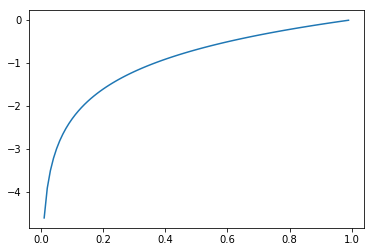

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y)
plt.show()

自然対数をプロットすると上図のようになる。xが1の時にyが0となる。
よって確率が上がれば上がるほど、誤差である自然対数は0に近づく。

交差エントロピーを実装すると以下となる。
np.logの計算時に微小値であるdeltaを加算している。np.log(0)の場合において無限小(-inf)となりエラーになることを防ぐためである。

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 「2」が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 「2」であると推定する場合(誤差が小さい)
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y_2), np.array(t)))

# 「7」であると推定する場合(誤差が大きい)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y_7), np.array(t)))

0.510825457099
2.30258409299


### 4.2.3 ミニバッチ学習
これまで算出した損失関数は一つの訓練データについて求めて、できるだけ小さくするようにパラメータを探そうとしていた。実際の学習では全ての訓練データを対象として損失関数を求め、パラメータを算出する必要がある。交差エントロピーの場合は以下式。($t_{nk}$はn個目のデータのk次元目の値を意味する。)

$$
E = - \frac{1}{N} \sum_{n}\sum_{k}t_{nk} log \;y_{nk}
$$

Nで割るのは訓練データ全ての平均誤差を算出するためであり、データ数に関係なく統一した指標として用いるためである。

しかし、大量の訓練データの場合は計算に時間がかかってしまうため、データの中から一部を選び出して全体の近似として利用する。このような学習方法を「ミニバッチ学習」という。





In [7]:
# ミニバッチ法の実装
import sys, os
sys.path.append(os.pardir)
import numpy as np
from src.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


# 訓練データをランダムに10枚抜き出す
train_size = x_train.shape[0]
batch_size = 10

# ミニバッチとして選出するインデックスを配列として取得
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

# 選出したインデックスの配列
print(batch_mask)

(60000, 784)
(60000, 10)
(10, 784)
(10, 10)
[37483 40992 22030 35208 28912 57311 59158 40865 35269  6901]


### 4.2.4 [バッチ対応版]交差エントロピー誤差の実装

バッチデータに対応した交差エントロピー誤差の実装



In [8]:
# 教師データがone-hot表現の場合
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = t.reshape(1, t.size)
    return -np.sum(t * np.log(y)) / batch_size


# 教師データがラベルの場合
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = t.reshape(1, t.size)
    return -np.sum(np.log(y[np.arange(batch_size)], t)) / batch_size

### 4.2.5 なぜ損失関数を設定するのか

なぜ認識精度を指標とせずに、損失関数を設定し精度を測るのか。それはニューラルネットワークの学習において、最適なパラメータを探索する際に損失関数を少なくするようにするためである。t探索においてはパラメータの微分(勾配)を計算し、値を手がかりにパラメータの値を徐々に更新していく。

認識精度では殆どの場所で微分した結果が0になってしまい更新できない。具体的には認識性能32%で合った状態からパラメータを少し変更しても認識性能が32%のままである可能性がある(認識精度はパラメータの微小な変化には反応せず、反応した場合は急に変わる可能性があるため更新の方向が分からない)。これはステップ関数にも同じ事が言える。
一方シグモイド関数はいずれの箇所をとっても微分が0になる箇所が無く、連続的に変化している。

## 4.3 数値微分

勾配とはどういうものか、どういう性質があるのかを説明する。


### 4.3.1 微分

単位時間あたりにどれだけ変化があったのかは「平均」として表す事が出来る(時速など)。一方「微分」はその瞬間の変化量を表すものである(1時間→1分→1秒→…としていく)。数式では以下で表される。
(左辺は$f(x)$のxについての微分を表す。)

$$
\frac{df(x)}{dx} = lim_{h→0}\frac{f(x+h)-f(x)}{h}
$$


Python実装中における微分を行なう上での工夫点

* 変化量$h$の設定方法

丸め誤差に留意する必要がある(1e-50など小さすぎる値ま丸められる)。$10^{-4}$くらいなら良い。

* 数値微分を行なう際の誤差軽減

上記式で微分を行なう際には真の接線ではなく、$x$と$x+h$の間の傾きを求めている(数値微分:numerical differentiation⇔数式的に展開して解析的に解く)ために誤差が生じる。
誤差を減らす工夫として$(x+h)$と$(x-h)$の差分を計算する。この手法は「中心差分」と呼ばれる。


これらの工夫を加えた実装は以下。


In [9]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 数値微分の例

以下式を微分してみる。

$ y = 0.01x^{2}+0.1x$


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


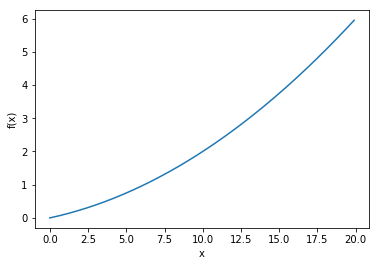

In [10]:
def function_1(x):
    return 0.01*x**2 + 0.1*x


import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [11]:
print(numerical_diff(function_1, 5))

print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


0.1999999999990898


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


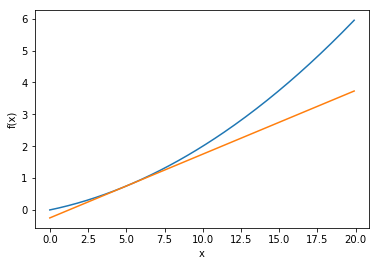

In [12]:
# 数値微分における傾きの確認

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 偏微分

以下式のような2変数の場合の微分を行なう。

$f(x0,x1) = x^{2}_{0} + x^{2}_{1}$

変数が2つあるため、どの変数に対しての微分かを区別する必要がある。($x_{0}$と$x_{1}$)
このような複数の変数からなる関数の微分を「偏微分」という。
それぞれ$\frac{\delta f}{\delta x_{0}}$$\frac{\delta f}{\delta x_{1}}$と表す。



In [14]:
# 2変数の関数
def function_2(x):
    return x[0]**2 + x[1]**2 # or np.sum(x**2)

# x0=3,x1=4のときのx0に対する偏微分
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))


# x0=3,x1=4のときのx1に対する偏微分
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 4.4 勾配

2変数の偏微分をまとめて行ない、$(\frac{\delta f}{\delta x_{0}},\frac{\delta f}{\delta x_{1}})$として表現する。このように全ての変数の偏微分をベクトルとしてまとめたものを「勾配(gradient)」という。


In [21]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


勾配の意味を確認すyるために以下関数の勾配を図で表す。

$f(x0,x1) = x^{2}_{0} + x^{2}_{1}$

勾配の結果にマイナスを付けたベクトルを描画すると、関数の一番低い場所(最小値)を指し示しているように見える。また、最小値から離れるほどベクトルも大きくなる。

ただし、勾配は必ずしも最小値を指し示すわけではないので注意。各場所において関数の値を最も減らす方向を表すものと考えられる。

/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


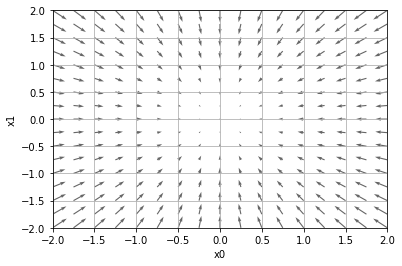

In [25]:
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 4.1.1 勾配法

機械学習の問題の多くは、学習の際に最適なパラメータを探索することである。最適なパラメータは損失関数が最小値を取る時であるが、損失関数は複雑であるため計算が難しい。そこで勾配を利用して最小値がどこであるか探すのが「勾配法」である。

ただし勾配は最小値でなく、各地点において関数の値を最も減らす方向を示すものである。実際に、複雑な関数においては勾配が指す方向は最小値でないことがほとんど。それでも関数の値を減らすことが出来るため勾配を用いることが多い。

勾配法では現在の地点から勾配方向に移動させ、その先でも同様に勾配を求める。勾配方向への移動を繰り返すことによって関数の値を徐々に減らすのが「勾配法(gradient method)」である。(最小値を探す場合を勾配降下法(gradient descent method)、最大値を探す場合を勾配上昇法(gradient ascent method)と呼ぶが、符号の反転でしかないので本質的には同義)

勾配法を数式で表すと以下となる。

$x_{0}=x_{0} - \eta \frac{\delta f}{\delta x_{0}}$

$x_{1}=x_{1} - \eta \frac{\delta f}{\delta x_{1}}$

$\eta$は更新量を表し、ニューラルネットワークでは「学習率(learning late)」と呼ばれる。1回の学習でどれだけパラメータを更新するかを定める変数。学習率は予め0.01や0.001など定めておく必要があるが、大きすぎても小さすぎても上手く学習することができない。ニューラルネットワークでは学習率の値を変更しながら正しく学習できているか確認作業を行なう。実装は以下となる。

fは最適化したい関数、init_xは初期値、lrは学習率learning rate、step_numは勾配法による繰り返しの数を意味する。

更新を繰り返し最小値へと降下していく様子は以下図となる。


In [37]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x =  init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x


# f(x0,x1)=x0^2＋x1^2の最小値を勾配法で求める
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(f=function_2, init_x=init_x, lr=0.1, step_num=100))

[ -6.11110793e-10   8.14814391e-10]


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


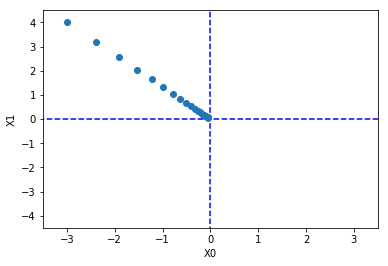

In [38]:
import numpy as np
import matplotlib.pylab as plt

def gradient_descent_tmp(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_tmp(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

学習率が大きすぎる場合と小さすぎる場合には良い結果が得られない。以下で確認。

学習率のようなパラメータは「ハイパーパラメータ」と呼ばれる。ニューラルネットワークのパラメータ(重みやバイアス)とは性質が異なり学習アルゴリズムによって自動で獲得されるパラメータではなく、人の手によって設定される。


In [42]:
# 学習率が大きすぎる例(10.0)
# 大きな値へ発散してしまう
init_x = np.array([-3.0, 4.0])
print(gradient_descent(f=function_2, init_x=init_x, lr=10.0, step_num=100))


# 学習率が大きすぎる例(1e-10)
# ほとんど更新されない
init_x = np.array([-3.0, 4.0])
print(gradient_descent(f=function_2, init_x=init_x, lr=1e-10, step_num=100))

[ -2.58983747e+13  -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.4.2 ニューラルネットワークに対する勾配

ニューラルネットワークでは重みパラメータに関する損失関数の勾配を求める。形状2×3の重み$W$だけ持つニューラルネットワークにおいて損失関数をLで表す場合、勾配は$\frac{\delta L}{\delta W}$と表せる

$$
W = \begin{pmatrix}
w_{1 1} &　w_{2 1} &　w_{3 1} \\
w_{1 2} &　w_{2 2} &　w_{3 2}
\end{pmatrix}
$$

$$
\frac{\delta L}{\delta W} = \begin{pmatrix}
\frac{\delta L}{\delta w_{1 1}} &　\frac{\delta L}{\delta w_{2 1}} &　\frac{\delta L}{\delta w_{3 1}} \\
\frac{\delta L}{\delta w_{1 2}} &　\frac{\delta L}{\delta w_{2 2}} &　\frac{\delta L}{\delta w_{3 2}} \\
\end{pmatrix}
$$


勾配を求める実装は以下のようになる。
予測するためのメソッドpredict(x)、損失関数の値を求めるメソッドloss(x, t)が存在する。xは入力データ、tは正解ラベルである。


In [53]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from src.functions import softmax, cross_entropy_error
from src.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W)  # 重みパラメータ

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)  # 予測値

print(np.argmax(p))  # 最大値のインデックス

t = np.array([0, 0, 1])  # 正解ラベル
print(net.loss(x, t))

[[-0.02388852  2.11369364 -0.92825222]
 [-0.05505939 -0.0040924   1.0094968 ]]
[-0.06388656  1.26453303  0.35159579]
1
1.42350635907


勾配は以下のように求められる。損失関数を減らすためには勾配の逆符号の方向へ更新をかけていく必要がある。

In [55]:
def f(W):
    return net.loss(x, t)
# lambda w: net.loss(x, t)　と記述することもできる

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.09538687  0.36009235 -0.45547922]
 [ 0.14308031  0.54013853 -0.68321883]]


## 4.5 学習アルゴリズムの実装

ニューラルネットワークの学習手順のおさらい

前提  
ニューラルネットワークは重みとバイアスが有り、訓練データに適応するように調整することを「学習」という。  

* ステップ1(ミニバッチ)  
訓練データからランダムに一部データ(ミニバッチ)を選び出す。ミニバッチの損失関数の値を減らすことを目的とする。

* ステップ2(勾配の算出)  
ミニバッチの損失関数を減らすために、各重みの勾配を算出する。

* ステップ3(パラメータの更新)  
重みパラメータを勾配方向にわずかだけ更新する。

* ステップ4(繰り返す)  
ステップ1,ステップ2、ステップ3を繰り返す。


ここではミニバッチとして無作為に選ばれたデータを使用していることから、「確率的勾配降下法(stochastic gradient descent。略してSGD)」と呼ばれる。


### 4.5.1 2層ニューラルネットワークのクラス

2層のニューラルネットワーク(隠れ層が1層)を一つのクラスとして実装する。
初期値はガウス分布に従う乱数で設定している。

numerical_gradientでは数値微分によって勾配を求めているが時間がかかる。後述する誤差逆伝播法をもちいたgradientも先に実装しておく。

In [3]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from src.functions import *
from src.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

### 4.5.2 ミニバッチ学習の実装

MNISTデータセットをもちいて学習を行なう。


### 4.5.3 テストデータで評価



train acc, test acc | 0.0993, 0.1032


train acc, test acc | 0.792933333333, 0.7971


train acc, test acc | 0.879483333333, 0.8839


train acc, test acc | 0.899783333333, 0.9047


train acc, test acc | 0.909816666667, 0.9109


train acc, test acc | 0.91595, 0.9186


train acc, test acc | 0.921783333333, 0.9235


train acc, test acc | 0.924766666667, 0.9276


train acc, test acc | 0.9296, 0.9314


train acc, test acc | 0.931766666667, 0.9334


train acc, test acc | 0.934683333333, 0.9354


train acc, test acc | 0.9368, 0.937


train acc, test acc | 0.939433333333, 0.94


train acc, test acc | 0.942133333333, 0.9424


train acc, test acc | 0.942883333333, 0.9421


train acc, test acc | 0.945216666667, 0.9439


train acc, test acc | 0.946683333333, 0.9459


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


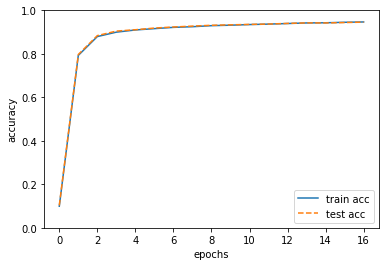

In [5]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from src.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# ハイパーパラメータ
iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # ミニバッチ取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データとテストデータ共にエポックが進むに連れて認識精度が向上しており、また互いに認識精度似さがないため過学習は発生していないと言える。